
Datos_originales
x1 = [1.0, 2.0, 4.0, 5.0]
x2 = [1.0, 1.0, 3.0, 4.0]



Iteracion 1: 

Valor de cluster
c1 = [1, 1]
c2 = [2, 1]

Matriz de Distancias
d_x1 = [0.0, 1.0, 3.605551275463989, 5.0]
d_x2 = [1.0, 0.0, 2.8284271247461903, 4.242640687119285]

matriz de unos y ceros
x1_c = [1, 0, 0, 0]
x2_c = [0, 1, 1, 1]



Iteracion 2: 

Valor de cluster
c1 = [1.0, 1.0]
c2 = [3.6666666666666665, 2.6666666666666665]

Matriz de Distancias
d_x1 = [0.0, 1.0, 3.605551275463989, 5.0]
d_x2 = [3.144660377352201, 2.357022603955158, 0.4714045207910319, 1.885618083164127]

matriz de unos y ceros
x1_c = [1, 1, 0, 0]
x2_c = [0, 0, 1, 1]



Iteracion 3: 

Valor de cluster
c1 = [1.5, 1.0]
c2 = [4.5, 3.5]

Matriz de Distancias
d_x1 = [0.5, 0.5, 3.2015621187164243, 4.6097722286464435]
d_x2 = [4.301162633521313, 3.5355339059327378, 0.7071067811865476, 0.7071067811865476]

matriz de unos y ceros
x1_c = [1, 1, 0, 0]
x2_c = [0, 0, 1, 1]


Grafica: 


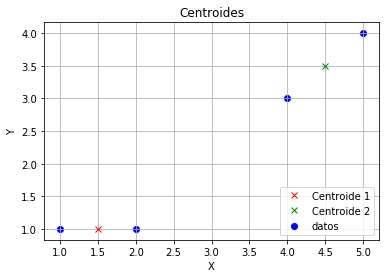

In [26]:
import pandas as pd #cargar datos
import numpy as np
import matplotlib.pyplot as plt
import math as m
datos = pd.read_csv("k.csv", header=None, skiprows=1, sep=';')
v_c1 = []
v_c2 = []
c1=[1,1]
c2=[2,1]
def guardar_datos():
  x1 = []
  x2 = []
  for i in range(len(datos[0])):
    x1.append(float(datos[0][i]))
  for i in range(len(datos[1])):
    x2.append(float(datos[1][i]))
  print("\nDatos_originales")
  print("x1 = " + str(x1))
  print("x2 = " + str(x2))
  return x1,x2

def distancia_e(x1,x2,c1,c2):
  d_x1 = []
  d_x2 = []
  print("\nValor de cluster")
  print("c1 = " + str(c1))
  print("c2 = " + str(c2))
  for i in range(len(x1)):
    d_x1.append(m.sqrt((c1[0]-x1[i])**2+(c1[1]-x2[i])**2))
    d_x2.append(m.sqrt((c2[0]-x1[i])**2+(c2[1]-x2[i])**2))
  print("\nMatriz de Distancias")
  print("d_x1 = " + str(d_x1))
  print("d_x2 = " + str(d_x2))
  return d_x1,d_x2

def matriz_1(x1,x2,d_x1,d_x2):
  x1_c = []
  x2_c = []
  for i in range(len(d_x1)):
    if(d_x1[i]>d_x2[i]):
      x1_c.append(0)
      x2_c.append(1)
    else:
      x1_c.append(1)
      x2_c.append(0)
  print("\nmatriz de unos y ceros")
  print("x1_c = " + str(x1_c))
  print("x2_c = " + str(x2_c))
  return x1_c, x2_c

def contar_1(x1,x2,x1_c,x2_c):
  temp_1 = []
  temp_2 = []
  con_1 = 0
  con_2 = 0
  temp1_x1 = 0
  temp1_x2 = 0
  temp2_x1 = 0
  temp2_x2 = 0
  for i in range(len(x1_c)):
    if(x1_c[i]==1):
      con_1 = con_1 + 1
    elif(x2_c[i]==1):
      con_2 = con_2 + 1
  for i in range(len(x1_c)):
    if(x1_c[i] == 1 ):
      temp1_x1 = (x1[i]+temp1_x1)
      temp1_x2 = (x2[i]+temp1_x2)
    elif(x2_c[i] == 1):
      temp2_x1 = (x1[i]+temp2_x1)
      temp2_x2 = (x2[i]+temp2_x2)
  temp_1.append(temp1_x1/con_1)
  temp_1.append(temp1_x2/con_1)
  temp_2.append(temp2_x1/con_2)
  temp_2.append(temp2_x2/con_2)
  return temp_1, temp_2

def k_means(x1,x2,iteracion):
  print("\n\n\nIteracion %d: " %iteracion)
  d_x1, d_x2 = distancia_e(x1,x2,c1,c2)
  x1_c , x2_c = matriz_1(x1,x2,d_x1,d_x2)
  temp_c1 , temp_c2 = contar_1(x1,x2,x1_c,x2_c)
  if(x1_c == v_c1 and x2_c == v_c2):
    print("\n\nGrafica: ")
    graficar(x1,x2,c1,c2)
  else:
    iteracion = iteracion +1
    for i in range(len(v_c1)):
      v_c1[i] = 0
      v_c2[i] = 0
    for i in range(len(c1)):
      c1[i] = temp_c1[i]
      c2[i] = temp_c2[i]
    for i in range(len(x1_c)):
      v_c1[i] = x1_c[i]
      v_c2[i] = x2_c[i]
    k_means(x1,x2,iteracion)

def graficar(x,y,c1,c2):
  plt.scatter(x, y, color="blue", label = "datos")
  plt.plot(c1[0],c1[1],"x", color="red", label = "Centroide 1")
  plt.plot(c2[0],c2[1],"x", color="green", label = "Centroide 2")
  plt.grid()
  plt.legend(loc="lower right")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Centroides")
  plt.show()

def ejecutar():
  iteracion = 1
  x1, x2 = guardar_datos()
  for i in range(len(x1)):
    v_c1.append(0)
    v_c2.append(0)
  k_means(x1,x2,iteracion)

ejecutar()


Datos_originales
x1 = [8.0, 4.0, 12.0, 3.0, 6.0]
x2 = [5.0, 2.0, 14.0, 6.0, 5.0]

Matriz de distancia: 
[0.0, 7.0, 13.0, 6.0, 2.0]
[7.0, 0.0, 20.0, 5.0, 5.0]
[13.0, 20.0, 0.0, 17.0, 15.0]
[6.0, 5.0, 17.0, 0.0, 4.0]
[2.0, 5.0, 15.0, 4.0, 0.0]

El valor mayor es: 20.000000 que se encuentra en la fila: 2 de la columna: 1



Iteracion 1: 

Datos actualizados
[8.0, 12.0, 3.0, 6.0]
[5.0, 14.0, 6.0, 5.0]

Matriz de distancia: 
[0.0, 13.0, 6.0, 2.0]
[13.0, 0.0, 17.0, 15.0]
[6.0, 17.0, 0.0, 4.0]
[2.0, 15.0, 4.0, 0.0]

El valor mayor es: 17.000000 que se encuentra en la fila: 2 de la columna: 1



Iteracion 2: 

Datos actualizados
[8.0, 3.0, 6.0]
[5.0, 6.0, 5.0]

Matriz de distancia: 
[0.0, 6.0, 2.0]
[6.0, 0.0, 4.0]
[2.0, 4.0, 0.0]

El valor mayor es: 6.000000 que se encuentra en la fila: 1 de la columna: 0



Iteracion 3: 

Datos actualizados
[3.0, 6.0]
[6.0, 5.0]

Matriz de distancia: 
[0.0, 4.0]
[4.0, 0.0]

El valor mayor es: 4.000000 que se encuentra en la fila: 1 de la columna: 0


Grafica

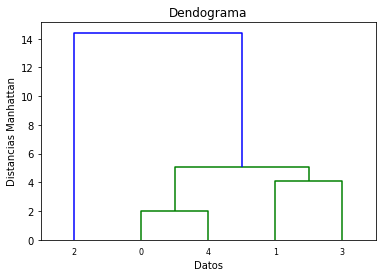

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.cluster.hierarchy as graficar
datos = pd.read_csv("k1.csv", header=None, skiprows=1, sep=';')
distancia = []


def guardar_datos():
  x1 = []
  x2 = []
  for i in range(len(datos[0])):
    x1.append(float(datos[0][i]))
  for i in range(len(datos[1])):
    x2.append(float(datos[1][i]))
  print("\nDatos_originales")
  print("x1 = " + str(x1))
  print("x2 = " + str(x2))
  return x1,x2
    
def calcular_distancia(x1,x2):
  m_distancia = []
  for i in range(len(x1)):
    m_distancia.append([])
    for j in range(len(x2)):
      m_distancia[i].append(abs(x1[j] - x1[i]) + abs(x2[j] -x2[i]))
  print("\nMatriz de distancia: ")
  for i in m_distancia:
      print(i)
  distancia = m_distancia
  return m_distancia

def mayor(x):
  mayor=x[0][0]
  fila=0
  columna=0
  for i in range(0,len(x)):
    for j in range(0,i):
      if (x[i][j]>mayor):
        mayor=x[i][j]
        fila=i
        columna=j
  print("\nEl valor mayor es: %f que se encuentra en la fila: %d de la columna: %d" % (mayor,fila,columna))
  return fila,columna      

def cluster(x1,x2,itera):
  bandera=1
  distancia = calcular_distancia(x1,x2)
  fila , columna = mayor(distancia)
  n_x1=[]
  n_x2=[]
  c1=(x1[fila]+x1[fila])/2
  c2=(x2[fila]+x2[fila])/2
  for i in range(len(x1)):
    if((i == fila or i == columna)and bandera==1):
      n_x1.append(c1)
      n_x2.append(c2)
      bandera=0
    elif(i!=fila and i!=columna):
      n_x1.append(x1[i])
      n_x2.append(x2[i])
  
  if(len(distancia)!=2):
    print(("\n\n\nIteracion %d: ")%itera)
    itera= itera +1
    print("\nDatos actualizados")    
    print(n_x1)
    print(n_x2)
    cluster(n_x1,n_x2,itera)
    
def graficar_dendograma():
  print("\n\nGrafica: ")
  dendrograma = graficar.dendrogram(graficar.linkage(datos, method = "complete"),leaf_rotation=0.,  
          leaf_font_size=8.,  
          show_contracted=True)
  plt.title("Dendograma")
  plt.xlabel("Datos")
  plt.ylabel("Distancias Manhattan")
  plt.show()
  
def ejecutar():
  itera= 1
  x1, x2 = guardar_datos()
  cluster(x1,x2,itera)
  graficar_dendograma()  
ejecutar()